In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_securities(after=None):
    query = 'query screen($limit:[SecurityLimitOptionInput!]!,$after:String){viewer{screenSecurities(filterTypes:EQUITY,limit:$limit,sort:{type:MARKET_CAP,direction:DESC},first:100,after:$after){pageInfo{hasNextPage,endCursor},edges{node{symbol}}}}}'
    variables = {'limit':[{'type':'MARKET_CAP','min':32000000000,'inclusive':True}],'after':after}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    cursor = r['data']['viewer']['screenSecurities']['pageInfo']['endCursor']
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenSecurities']['edges']], cursor
s1, after = screen_securities()
s2, after = screen_securities(after)
symbols = s1 + s2 + screen_securities(after)[0]
print(len(symbols))
quote = Quote(symbols, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
293
from 2019-05-20 to 2019-07-08 - 293


In [2]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0.2) & (stats['len'] == stats['len'].max())]
print(len(stats))
stats

197


,len,mean,std,shrp,drawdown
Symbols,,,,,
DE,29,3.239923,2.695669,1.187179,1.623278
ILMN,29,3.465395,3.097408,1.105993,2.964856
DHR,29,1.690519,1.586247,1.040718,1.962006
RELX,29,1.149410,1.073691,1.033563,1.928484
BHP,29,1.911355,1.843012,1.015551,4.002036
WMT,29,1.636963,1.706077,0.936230,1.198009
RACE,29,2.585327,2.721978,0.935218,1.670678
AON,29,1.638945,1.775377,0.900801,1.875778
SYK,29,2.062063,2.273146,0.889683,2.457642


evicted ATVI 0.6991036462253086
evicted IBN 0.5748428676929215
evicted UBER 0.6869725925670629
evicted PBR 0.6784430972894538
evicted CHU 0.6950378407108165
evicted ANTM 0.6746816434114176
evicted INFY 0.6342417233453997
evicted DE 0.6589449977732706
evicted AMX 0.5609756689516943
evicted CME 0.6491170130141605
evicted RHT 0.675862374246778
evicted AMAT 0.6530418160194668
evicted NGG 0.6539414440804375
evicted NVS 0.6114957577028715
evicted AMD 0.5846164807257117
evicted TSLA 0.6703730871356688
retry backlogs ['SNE', 'BABA', 'ING', 'BLK', 'NVDA', 'BKNG', 'LVS', 'VOD', 'AABA', 'ORAN', 'TD', 'SNY', 'TEF', 'AAPL', 'MAR', 'HDB', 'USB', 'MRK', 'TGT', 'TRP', 'COST', 'DD', 'BCE', 'ILMN', 'MDT', 'MMM', 'GE', 'CHA', 'VRTX', 'BAM', 'ROST', 'GM', 'NKE', 'TXN', 'TEAM', 'AXP', 'VFC', 'INTU', 'WBA', 'NFLX', 'CP', 'BAX', 'CI', 'AMGN', 'ETN', 'WM', 'MSFT', 'DAL', 'PBR-A', 'TMO', 'CAT', 'PNC', 'TSM', 'ABB', 'EW', 'CTSH', 'BDX', 'BSBR', 'SAN', 'TEL', 'BUD', 'ITUB', 'ABEV', 'MUFG', 'INTC', 'HCA', 'ASML',

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,1.881144,0.490499,0.824840,1.588282,1.885475,2.223983,2.774161,3.754261,0.687004
WMT,29.0,1.636963,1.706077,-0.691535,0.492612,1.537044,2.252248,5.453117,0.936230,1.198009
HD,29.0,1.874831,2.283648,-2.076541,-0.678159,2.144721,4.252666,5.206084,0.803604,3.081654
BBD,29.0,2.940494,3.860620,-4.175362,0.628936,3.487879,4.853748,11.071861,0.751385,4.374995
VALE,29.0,2.360819,3.166184,-2.308268,-0.480765,2.084883,4.905062,8.676598,0.733102,5.814791
DIS,29.0,1.150425,1.950628,-1.915215,-0.420735,1.628071,2.894584,4.544079,0.569428,2.144299
AGN,29.0,4.198258,13.340922,-12.250016,-4.478658,1.011992,8.115709,34.640247,0.311716,17.045367
RIO,29.0,0.763906,2.625745,-3.066992,-1.591025,0.310720,3.019364,6.173475,0.275816,5.774361
FB,29.0,1.268798,4.972715,-9.339448,-1.246499,1.430049,5.410025,8.116913,0.247172,11.423490


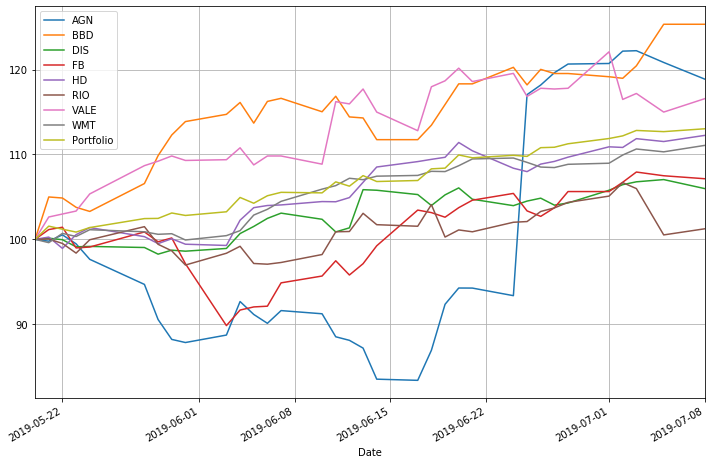

In [4]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio(.02, backlogs_threshold=.7)
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)